In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
path=r"G:\vgsales.csv"
data=pd.read_csv(path)
vgs=data.copy()
vgs

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [138]:
vgs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [139]:
vgs.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [140]:
vgs.describe(include='all')

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598,16598,16327.000000,16598,16540,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
unique,NaN,11493,31,NaN,12,578,NaN,NaN,NaN,NaN,NaN
top,NaN,Need for Speed: Most Wanted,DS,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN
freq,NaN,12,2163,NaN,3316,1351,NaN,NaN,NaN,NaN,NaN
mean,8300.605254,NaN,NaN,2006.406443,NaN,NaN,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,NaN,NaN,5.828981,NaN,NaN,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,NaN,NaN,1980.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,NaN,NaN,2007.000000,NaN,NaN,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,NaN,NaN,2010.000000,NaN,NaN,0.240000,0.110000,0.040000,0.040000,0.470000


**Insights**
- 1-data has 11 columns and 16598 rows
- 2-column Year has 271 nulls and column Publisher has 58 nulls
- 3-max global sales equal 82.74 millions
- 4-min and max of year feature is 1980 and 2020 respectively
- 5-the highest genre freq is Action with 3316 times
- 6-the highest platform freq is DS with 2163 times
- 7-the highest name freq is Need for Speed with 12 times
- 8-Name feature has 16598 values with 11493 values
- 9-Genre feature has 16598 values with 12 values
- 10-Publisher feature has 16540 values with 578 values

In [142]:
vgs.nunique()

Rank            16598
Name            11493
Platform           31
Year               39
Genre              12
Publisher         578
NA_Sales          409
EU_Sales          305
JP_Sales          244
Other_Sales       157
Global_Sales      623
dtype: int64

In [143]:
top_3_genre=vgs.groupby('Genre')['Global_Sales'].sum().nlargest(3)
top_3_genre

Genre
Action     1751.18
Sports     1330.93
Shooter    1037.37
Name: Global_Sales, dtype: float64

In [144]:
top_5_Action_game=vgs[vgs['Genre']=='Action'].groupby(['Name','Platform'])['Global_Sales'].max().nlargest(5)
top_5_Action_game

Name                           Platform
Grand Theft Auto V             PS3         21.40
Grand Theft Auto: San Andreas  PS2         20.81
Grand Theft Auto V             X360        16.38
Grand Theft Auto: Vice City    PS2         16.15
Grand Theft Auto III           PS2         13.10
Name: Global_Sales, dtype: float64

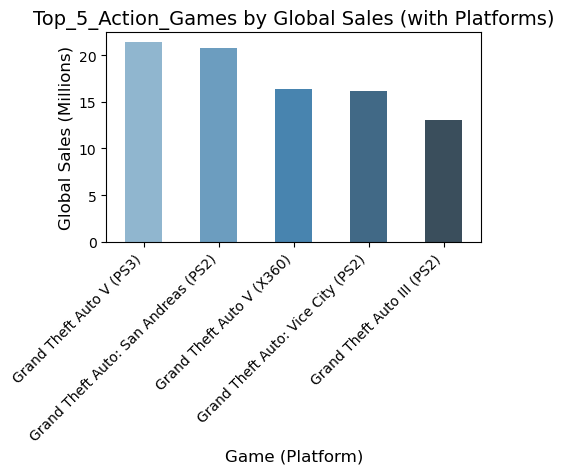

In [145]:
 plt.figure(figsize=(5, 4.85))
sns.barplot(
    x=top_5_Action_game.reset_index().apply(lambda row: f"{row['Name']} ({row['Platform']})", axis=1),
    y='Global_Sales',
    data=top_5_Action_game.reset_index(), 
    palette='Blues_d',
    width=0.5
         )
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.title('Top_5_Action_Games by Global Sales (with Platforms)', fontsize=14)
plt.xlabel('Game (Platform)', fontsize=12)
plt.ylabel('Global Sales (Millions)', fontsize=12)
plt.tight_layout()
plt.show()

In [146]:
top_5_sports_game=vgs[vgs['Genre']=='Sports'].groupby(['Name','Platform'])['Global_Sales'].max().nlargest(5)
top_5_sports_game

Name               Platform
Wii Sports         Wii         82.74
Wii Sports Resort  Wii         33.00
Wii Fit            Wii         22.72
Wii Fit Plus       Wii         22.00
FIFA 16            PS4          8.49
Name: Global_Sales, dtype: float64

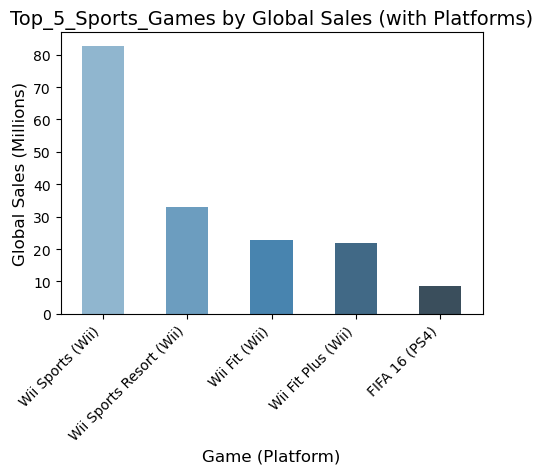

In [147]:
plt.figure(figsize=(5, 4.85))
sns.barplot(
    x=top_5_sports_game.reset_index().apply(lambda row: f"{row['Name']} ({row['Platform']})", axis=1),
    y='Global_Sales', 
    data=top_5_sports_game.reset_index(), 
    palette='Blues_d',
    width=0.5
         )
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.title('Top_5_Sports_Games by Global Sales (with Platforms)', fontsize=14)
plt.xlabel('Game (Platform)', fontsize=12)
plt.ylabel('Global Sales (Millions)', fontsize=12)
plt.tight_layout()
plt.show()

In [148]:
top_5_shooter_game=vgs[vgs['Genre']=='Shooter'].groupby(['Name','Platform'])['Global_Sales'].max().nlargest(5)
top_5_shooter_game

Name                            Platform
Duck Hunt                       NES         28.31
Call of Duty: Modern Warfare 3  X360        14.76
Call of Duty: Black Ops         X360        14.64
Call of Duty: Black Ops 3       PS4         14.24
Call of Duty: Black Ops II      PS3         14.03
Name: Global_Sales, dtype: float64

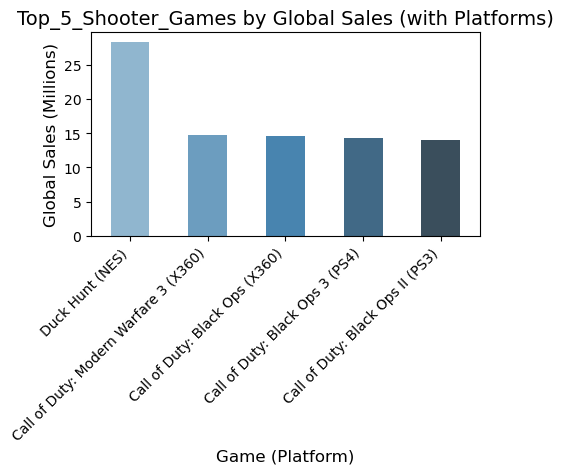

In [149]:
plt.figure(figsize=(5, 4.85))
sns.barplot(
    x=top_5_shooter_game.reset_index().apply(lambda row: f"{row['Name']} ({row['Platform']})", axis=1),
    y='Global_Sales', 
    data=top_5_shooter_game.reset_index(), 
    palette='Blues_d',
    width=0.5
         )
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.title('Top_5_Shooter_Games by Global Sales (with Platforms)', fontsize=14)
plt.xlabel('Game (Platform)', fontsize=12)
plt.ylabel('Global Sales (Millions)', fontsize=12)
plt.tight_layout()
plt.show()

In [150]:
global_sales_each_genre=vgs.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
global_sales_each_genre

Genre
Action          1751.18
Sports          1330.93
Shooter         1037.37
Role-Playing     927.37
Platform         831.37
Misc             809.96
Racing           732.04
Fighting         448.91
Simulation       392.20
Puzzle           244.95
Adventure        239.04
Strategy         175.12
Name: Global_Sales, dtype: float64

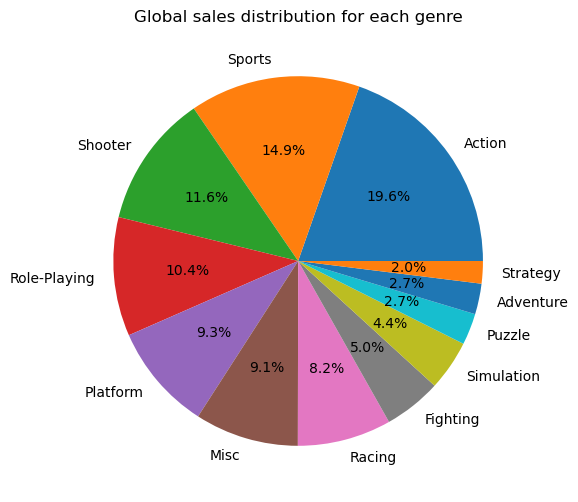

In [151]:
plt.figure(figsize=(7, 6))
plt.pie(global_sales_each_genre.values,
        labels=global_sales_each_genre.index,
        autopct='%1.1f%%'
       )
plt.title('Global sales distribution for each genre')
plt.show()

In [152]:
top_5_pubisher_sales=vgs.groupby('Publisher')['Global_Sales'].sum().nlargest(5)
top_5_pubisher_sales

Publisher
Nintendo                       1786.56
Electronic Arts                1110.32
Activision                      727.46
Sony Computer Entertainment     607.50
Ubisoft                         474.72
Name: Global_Sales, dtype: float64

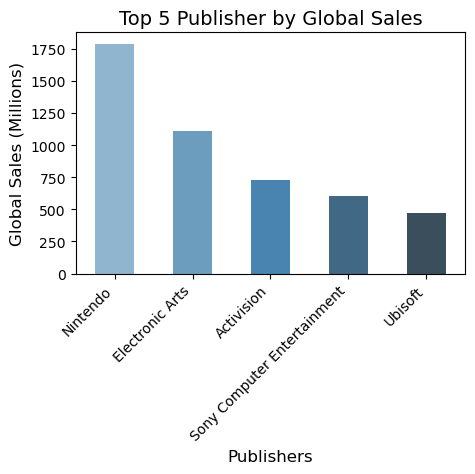

In [153]:
plt.figure(figsize=(4.85, 4.85))
sns.barplot(
    x='Publisher',
    y='Global_Sales',  
    data=top_5_pubisher_sales.reset_index(), 
    palette='Blues_d',
    width=0.5
         )
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.title('Top 5 Publisher by Global Sales', fontsize=14)
plt.xlabel('Publishers', fontsize=12)
plt.ylabel('Global Sales (Millions)', fontsize=12)
plt.tight_layout()
plt.show()

In [154]:
best_5_seller_game_in_NA =vgs.groupby(['Name','Genre'])[['NA_Sales']].max().nlargest(5,columns='NA_Sales')
best_5_seller_game_in_NA

,,NA_Sales
Name,Genre,
Wii Sports,Sports,41.49
Super Mario Bros.,Platform,29.08
Duck Hunt,Shooter,26.93
Tetris,Puzzle,23.20
Mario Kart Wii,Racing,15.85


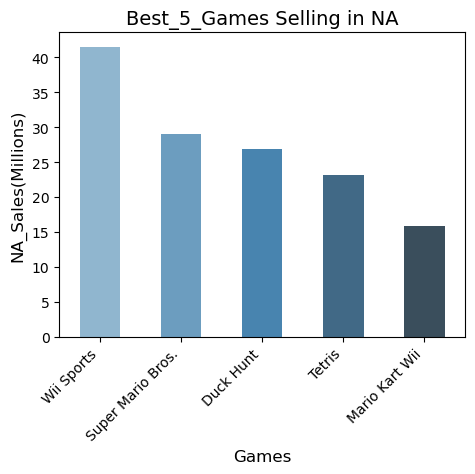

In [155]:
plt.figure(figsize=(4.85, 4.85))
sns.barplot(
    x='Name',
    y='NA_Sales',  
    data=best_5_seller_game_in_NA.reset_index(), 
    palette='Blues_d',
    width=0.5
         )
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.title('Best_5_Games Selling in NA', fontsize=14)
plt.xlabel('Games', fontsize=12)
plt.ylabel('NA_Sales(Millions)', fontsize=12)
plt.tight_layout()
plt.show()

In [156]:
best_5_seller_game_in_EU=vgs.groupby(['Name','Genre'])[['EU_Sales']].max().nlargest(5,columns='EU_Sales')
best_5_seller_game_in_EU

,,EU_Sales
Name,Genre,
Wii Sports,Sports,29.02
Mario Kart Wii,Racing,12.88
Wii Sports Resort,Sports,11.01
Nintendogs,Simulation,11.00
Grand Theft Auto V,Action,9.27


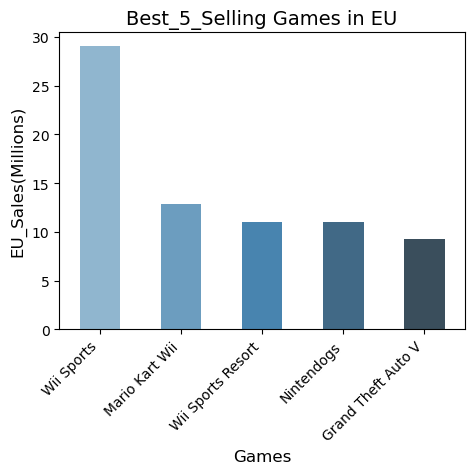

In [157]:
plt.figure(figsize=(4.85, 4.85))
sns.barplot(
    x='Name',
    y='EU_Sales',  
    data=best_5_seller_game_in_EU.reset_index(), 
    palette='Blues_d',
    width=0.5
         )
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.title('Best_5_Selling Games in EU', fontsize=14)
plt.xlabel('Games', fontsize=12)
plt.ylabel('EU_Sales(Millions)', fontsize=12)
plt.tight_layout()
plt.show()

In [158]:
best_5_seller_game_in_JP=vgs.groupby(['Name','Genre'])[['JP_Sales']].max().nlargest(5,columns='JP_Sales')
best_5_seller_game_in_JP

,,JP_Sales
Name,Genre,
Pokemon Red/Pokemon Blue,Role-Playing,10.22
Pokemon Gold/Pokemon Silver,Role-Playing,7.20
Super Mario Bros.,Platform,6.81
New Super Mario Bros.,Platform,6.50
Pokemon Diamond/Pokemon Pearl,Role-Playing,6.04


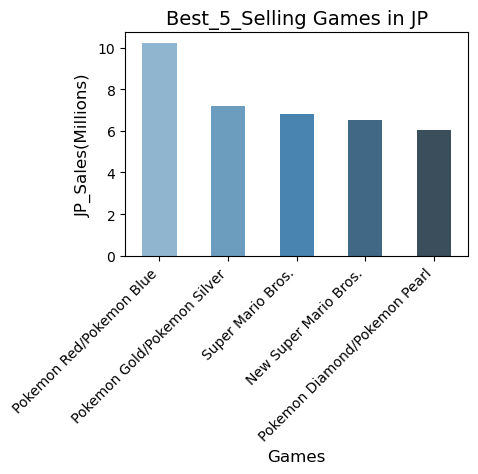

In [159]:
plt.figure(figsize=(4.85, 4.85))
sns.barplot(
    x='Name',
    y='JP_Sales',  
    data=best_5_seller_game_in_JP.reset_index(), 
    palette='Blues_d',
    width=0.5
         )
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.title('Best_5_Selling Games in JP', fontsize=14)
plt.xlabel('Games', fontsize=12)
plt.ylabel('JP_Sales(Millions)', fontsize=12)
plt.tight_layout()
plt.show()

In [160]:
NA_sales_each_genre=vgs.groupby('Genre')['NA_Sales'].sum().sort_values(ascending=False)
NA_sales_each_genre

Genre
Action          877.83
Sports          683.35
Shooter         582.60
Platform        447.05
Misc            410.24
Racing          359.42
Role-Playing    327.28
Fighting        223.59
Simulation      183.31
Puzzle          123.78
Adventure       105.80
Strategy         68.70
Name: NA_Sales, dtype: float64

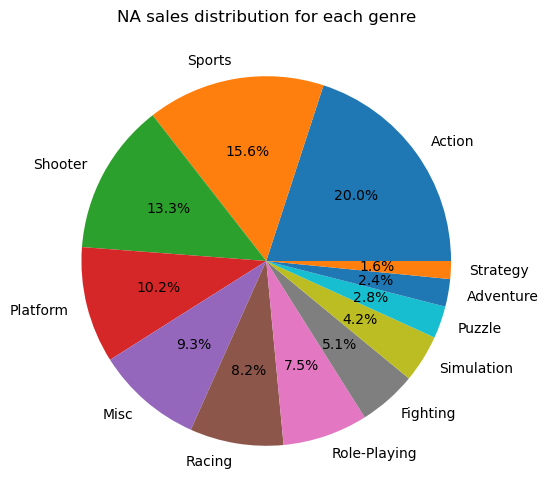

In [161]:
plt.figure(figsize=(7, 6))
plt.pie(NA_sales_each_genre.values,
        labels=NA_sales_each_genre.index,
        autopct='%1.1f%%'
       )
plt.title('NA sales distribution for each genre')
plt.show()

In [162]:
EU_sales_each_genre=vgs.groupby('Genre')['EU_Sales'].sum().sort_values(ascending=False)
EU_sales_each_genre

Genre
Action          525.00
Sports          376.85
Shooter         313.27
Racing          238.39
Misc            215.98
Platform        201.63
Role-Playing    188.06
Simulation      113.38
Fighting        101.32
Adventure        64.13
Puzzle           50.78
Strategy         45.34
Name: EU_Sales, dtype: float64

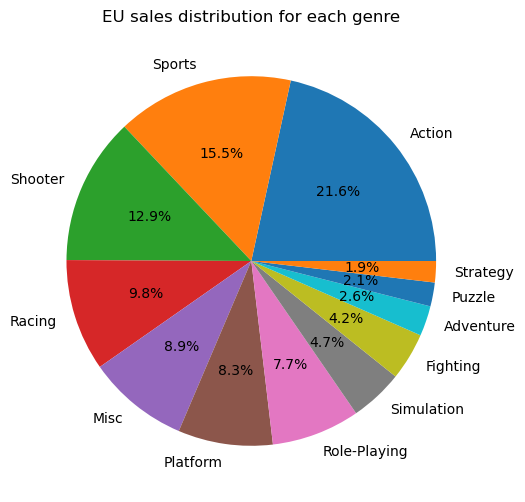

In [163]:
plt.figure(figsize=(7, 6))
plt.pie(EU_sales_each_genre.values,
        labels=EU_sales_each_genre.index,
        autopct='%1.1f%%'
       )
plt.title('EU sales distribution for each genre')
plt.show()

In [164]:
JP_sales_each_genre=vgs.groupby('Genre')['JP_Sales'].sum().sort_values(ascending=False)
JP_sales_each_genre

Genre
Role-Playing    352.31
Action          159.95
Sports          135.37
Platform        130.77
Misc            107.76
Fighting         87.35
Simulation       63.70
Puzzle           57.31
Racing           56.69
Adventure        52.07
Strategy         49.46
Shooter          38.28
Name: JP_Sales, dtype: float64

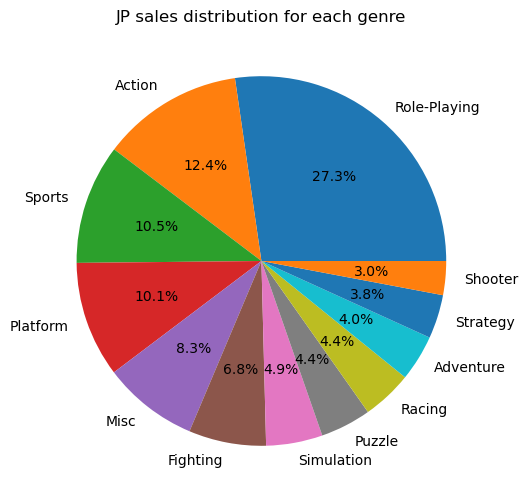

In [165]:
plt.figure(figsize=(7, 6))
plt.pie(JP_sales_each_genre.values,
        labels=JP_sales_each_genre.index,
        autopct='%1.1f%%'
       )
plt.title('JP sales distribution for each genre')
plt.show()

In [166]:
best_seller_games = vgs.loc[vgs.groupby('Genre')['Global_Sales'].idxmax()].sort_values('Global_Sales', ascending=False)
best_seller_games[['Genre', 'Name', 'Year', 'Publisher', 'Platform', 'Rank','Global_Sales']].set_index('Genre')

,Name,Year,Publisher,Platform,Rank,Global_Sales
Genre,,,,,,
Sports,Wii Sports,2006.0,Nintendo,Wii,1,82.74
Platform,Super Mario Bros.,1985.0,Nintendo,NES,2,40.24
Racing,Mario Kart Wii,2008.0,Nintendo,Wii,3,35.82
Role-Playing,Pokemon Red/Pokemon Blue,1996.0,Nintendo,GB,5,31.37
Puzzle,Tetris,1989.0,Nintendo,GB,6,30.26
Misc,Wii Play,2006.0,Nintendo,Wii,8,29.02
Shooter,Duck Hunt,1984.0,Nintendo,NES,10,28.31
Simulation,Nintendogs,2005.0,Nintendo,DS,11,24.76
Action,Grand Theft Auto V,2013.0,Take-Two Interactive,PS3,17,21.40


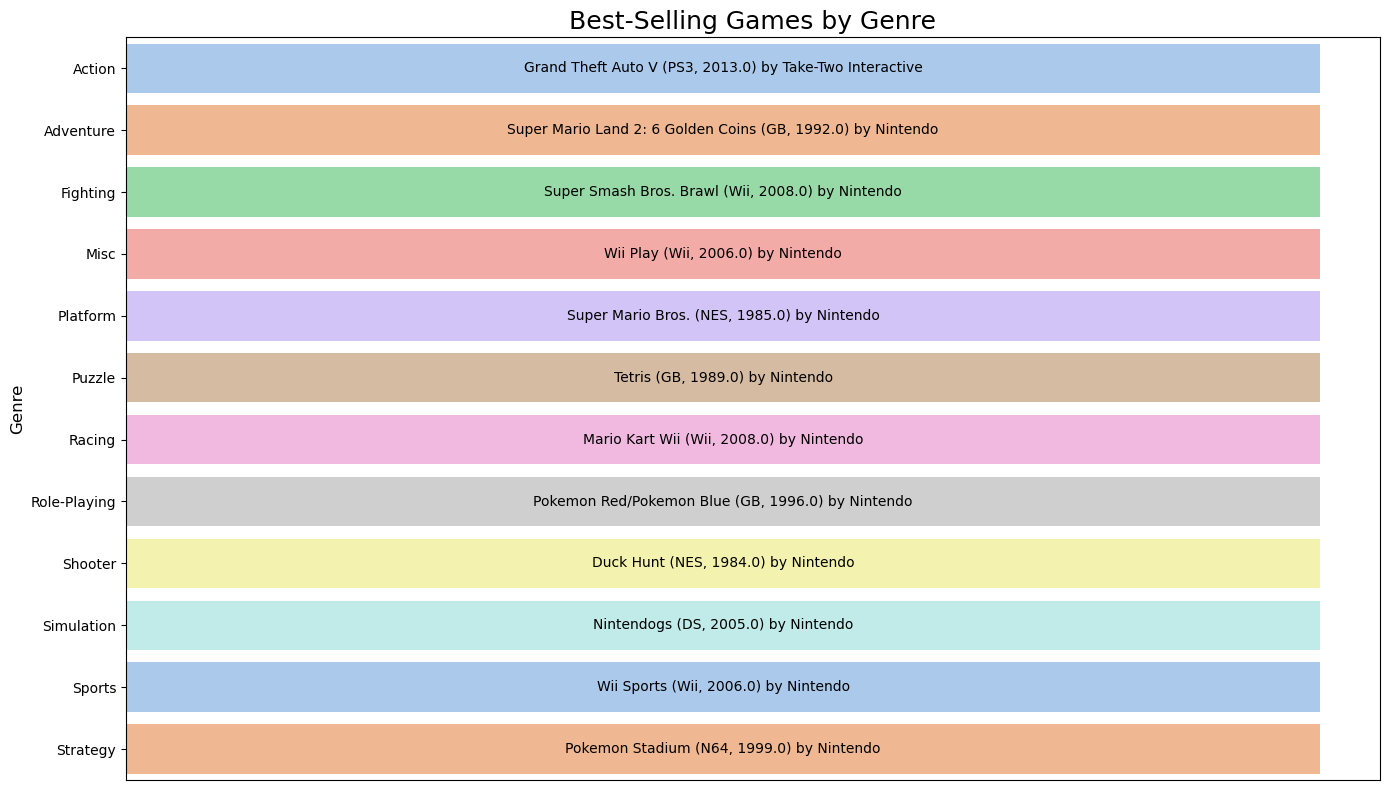

In [167]:
best_seller_games = best_seller_games.sort_values('Genre')
plt.figure(figsize=(14, 8))
bars = sns.barplot(
    x=[1] * len(best_seller_games),
    y='Genre', 
    data=best_seller_games, 
    palette='pastel'
)
for i, (name, platform, year, publisher) in enumerate(zip(
    best_seller_games['Name'], 
    best_seller_games['Platform'], 
    best_seller_games['Year'], 
    best_seller_games['Publisher']
)):
    label = f"{name} ({platform}, {year}) by {publisher}"
    bar = bars.patches[i]
    plt.text(
        bar.get_width() / 2,     
        bar.get_y() + bar.get_height() / 2,  
        label, 
        ha='center',  
        va='center',  
        fontsize=10,
        color='black'
    )
plt.title('Best-Selling Games by Genre', fontsize=18)
plt.xlabel('')
plt.ylabel('Genre', fontsize=12)
plt.xticks([])
plt.tight_layout()
plt.show()

In [168]:
sales_by_publisher_genre = vgs.groupby(['Genre', 'Publisher'])['Global_Sales'].sum().reset_index()
best_seller_publishers = sales_by_publisher_genre.loc[sales_by_publisher_genre.groupby('Genre')['Global_Sales'].idxmax()]
best_seller_publishers = best_seller_publishers.sort_values(by='Global_Sales', ascending=False)
best_seller_publishers.set_index('Genre')

,Publisher,Global_Sales
Genre,,
Sports,Electronic Arts,479.67
Platform,Nintendo,427.21
Shooter,Activision,299.87
Role-Playing,Nintendo,284.90
Action,Take-Two Interactive,211.08
Misc,Nintendo,180.67
Racing,Nintendo,151.30
Puzzle,Nintendo,124.88
Simulation,Electronic Arts,89.53


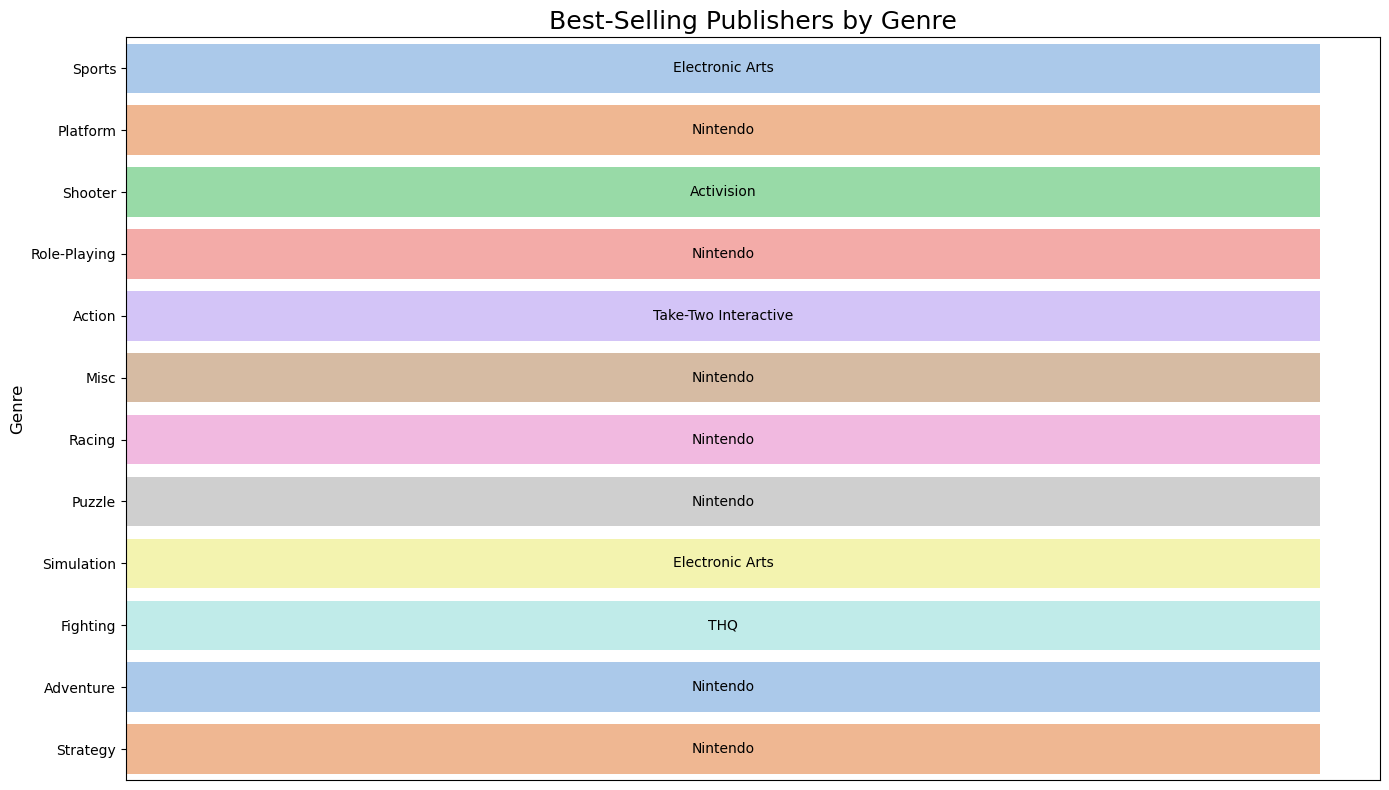

In [169]:
plt.figure(figsize=(14, 8))
bars = sns.barplot(
    x=[1] * len(best_seller_publishers),
    y='Genre', 
    data=best_seller_publishers, 
    palette='pastel'
)
for i, publisher in enumerate(best_seller_publishers['Publisher']):
    bar = bars.patches[i]
    plt.text(
        bar.get_width() / 2,   
        bar.get_y() + bar.get_height() / 2,  
        publisher, 
        ha='center',  
        va='center', 
        fontsize=10,
        color='black'
    )
plt.title('Best-Selling Publishers by Genre', fontsize=18)
plt.xlabel('')
plt.ylabel('Genre', fontsize=12)
plt.xticks([])
plt.tight_layout()
plt.show()